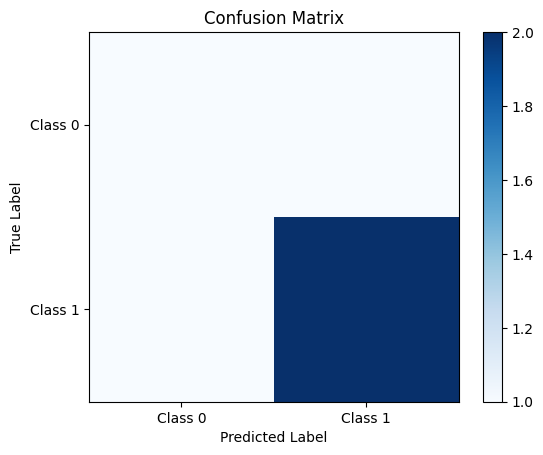

In [1]:
import os
import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

# Your code goes here

# Example usage of confusion matrix
y_true = [0, 1, 0, 1, 1]
y_pred = [1, 1, 0, 1, 0]
labels = ['Class 0', 'Class 1']
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [2]:
#!pip install scikit-learn



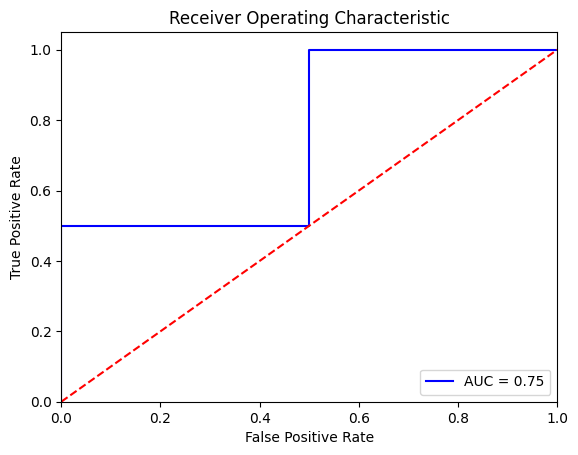

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example usage of roc_curve and auc
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [6]:
df = pd.read_csv('modified_categorized_reviews15.csv', engine='python',usecols=['Base_Reviews','category'])
df = df[pd.notnull(df['category'])]
print(df.head())
print(df['Base_Reviews'].astype(str).apply(lambda x: len(x.split(' '))).sum())
df.groupby('category').count()

                                        Base_Reviews  \
0  I have a Canon Pixma MG7520 and this app will ...   
1  The print quality is terrible. Doesn't seem to...   
2                  Wasn't compatible with my printer   
3  Unable to get it to print from any of my andro...   
4  I thought this was finally going to be a great...   

                          category  
0  Compatibility and Device Issues  
1  Compatibility and Device Issues  
2  Compatibility and Device Issues  
3  Compatibility and Device Issues  
4       Functionality and Features  
535320


,Base_Reviews
category,
Compatibility and Device Issues,865
Customer Support and Responsiveness,652
Functionality and Features,3878
Performance and Stability,2289
Security and Privacy Concerns,146
User Interface and UX,1140


In [7]:
labels  = Emotions = 'Compatibility and Device Issues	','Customer Support and Responsiveness','Functionality and Features','Performance and Stability	','Security and Privacy Concerns	','User Interface and UX'


In [8]:
labels  = Emotions = 'Compatibility and Device Issues','Customer Support and Responsiveness','Functionality and Features','Performance and Stability','Security and Privacy Concerns','User Interface and UX'


## clean_text
clean the text by removing special characters, punctuations, etc.

In [9]:
import spacy
from bs4 import BeautifulSoup

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Modify the stop words list as necessary (e.g., add or remove specific words)
# For this example, we'll simply use spacy's default stop words
STOPWORDS = nlp.Defaults.stop_words

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text  # HTML decoding
    doc = nlp(text, disable=["parser", "ner"])  # Tokenization (and optionally disable unnecessary components)
    
    # Convert tokens to lowercase (if they're not punctuation) and remove stop words
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Example
text = "<p>This is a sample text with some @random, symbols; and stopwords like 'the', 'and'.</p>"
print(clean_text(text))




sample text @random symbols stopwords like


In [10]:
#!pip install spacy
#!pip install lxml
#import sys
#print(sys.executable)
#!pip install lxml
#!pip install spacy


In [11]:
#!python -m spacy download en_core_web_sm
#!pip install nltk


In [12]:
# Text Pre-processing (text cleaning techniques)
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nekdilkhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def print_plot(index):
    example = df[df.index == index][['Base_Reviews', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('category:', example[1])
print_plot(1)

The print quality is terrible. Doesn't seem to be compatible with my printer. Waste of money
category: Compatibility and Device Issues


In [14]:
# We want to show a look a Clean text and lables as you wanna.(After text_Preprocessing)
df['Base_Reviews'] = df['Base_Reviews'].astype(str).apply(clean_text)
print_plot(1) # 4567

print quality terrible doesnt seem compatible printer waste money
category: Compatibility and Device Issues


In [15]:
def clean_text(text):
    """ clean the text by removing special characters, punctuations, etc. """
    text = text.lower()
    remove_xx_seq  = re.compile('xx+')
    replace_by_space = re.compile('[/(){}\[\]\|@,;]')
    remove_special_characters = re.compile('[^0-9a-z +]')
    remove_extra_space = re.compile('[^A-Za-z0-9]+')
    remove_numbers = re.compile('[0-9]+')
    text = re.sub(remove_xx_seq, ' ', text)
    text = re.sub(replace_by_space, ' ', text)
    text = re.sub(remove_special_characters, ' ', text)
    text = re.sub(remove_numbers, ' ', text)
    text = re.sub(remove_extra_space, ' ', text)
    return text.strip()

## preprocess_corpus
Preprocess the entire corpus including cleaning the text documents and return the updated dataframe.

In [16]:
def preprocess_corpus(df, column='text'):
    """ Preprocess the entire corpus including cleaning the text documents and return the updated dataframe. """
    df[column] = df[column].apply(clean_text)
    return df

## Encode_labels
Encode the class labels into a numbers.

In [17]:
def encode_labels(labels):
    """ Encode the class labels into a numbers. """
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(labels)
    #label_encoder.get_vocabulary()
    return label_encoder


## Compute_tfidf
 Calculate the tfidf features for all the text documents and return a (documents, fatures) matrix. 

In [18]:
#def compute_tfidf(corpus, stop_words='english', ngram_range=(1, 1), max_features=None):
 #   """ Calculate the tfidf features for all the text documents and return a (documents, fatures) matrix. """
  #  vectorizer = TfidfVectorizer(input='content', stop_words=stop_words, ngram_range=ngram_range, min_df=3, max_df=0.9, max_features=max_features)
  #  print('Computing tfidf features...', end='')
  #  X = vectorizer.fit_transform(corpus)
  #  print('done!')
  #  return X, vectorizer

## Count Vectorizer

In [19]:
 def compute_count(corpus, stop_words='english', ngram_range=(1, 1), max_features=None):
     """ Calculate the Count Vectorizer features for all the text documents and return a (documents, fatures) matrix. """
     vectorizer = CountVectorizer(input='content', stop_words=stop_words, ngram_range=ngram_range, min_df=3, max_df=0.9, max_features=max_features)
     print('Computing tfidf features...', end='')
     X = vectorizer.fit_transform(corpus)
    
     return X, vectorizer

## Train_test_model
Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports.

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
alg_accuracy= []
alg_p_r_f_score =[]

def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    """ Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports. """
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    ####javed####
    alg_accuracy= accuracy_score(predictions, y_test)
    alg_p_r_f_score = precision_recall_fscore_support(y_test,predictions, average=None)
     ####javed####
    f1score = f1_score(y_test, predictions, average='weighted', pos_label=4)
    confusionMatrix = confusion_matrix(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted', pos_label=4)
    precision = precision_score(y_test, predictions, average='weighted', pos_label=4)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
#    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    return predictions, accuracy, precision, recall, f1score, alg_accuracy, alg_p_r_f_score
    #return  predictions, accuracy, tpr, fpr

Number of categories:  ['Compatibility and Device Issues' 'Functionality and Features'
 'Customer Support and Responsiveness' 'Security and Privacy Concerns'
 'Performance and Stability' 'User Interface and UX']



<Axes: title={'center': 'Categories vs Number of reviews'}, xlabel='category'>

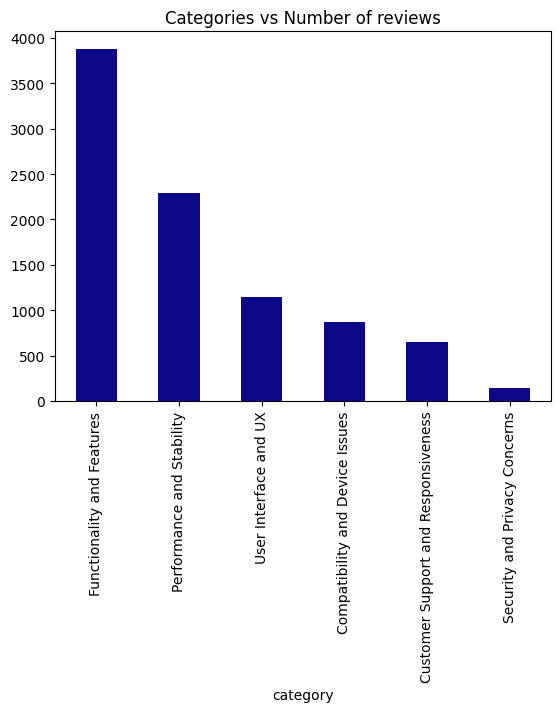

In [21]:
categories = df.category.unique()
print('Number of categories: ', categories)
print()
df.category.value_counts().plot(kind='bar', title='Categories vs Number of reviews', cmap='plasma')

# Setting for model TFIDF Features

In [22]:
# Create tfidf features from the text
stop_words    = 'english'
ngram_range   = (1, 1)
max_features  = None
#X, vectorizer = compute_tfidf(df['Base_Reviews'].apply(lambda x: np.str_(x)), stop_words, ngram_range, max_features)
X, vectorizer = compute_count(df['Base_Reviews'].apply(lambda x: np.str_(x)), stop_words, ngram_range, max_features)

# Encode the labels
labels = df.category.unique()
label_encoder = encode_labels(labels)
y = label_encoder.transform(df.category)
print(X)
print(vectorizer)
print(y)

Computing tfidf features...  (0, 838)	1
  (0, 429)	1
  (0, 5479)	1
  (0, 3741)	4
  (0, 4388)	1
  (0, 1738)	1
  (0, 3051)	1
  (0, 2258)	1
  (0, 4835)	1
  (0, 2161)	1
  (0, 194)	1
  (0, 1252)	1
  (0, 3133)	1
  (0, 1602)	1
  (0, 1603)	1
  (0, 2734)	1
  (0, 1080)	1
  (1, 3741)	1
  (1, 1080)	1
  (1, 3739)	1
  (1, 3851)	1
  (1, 4936)	1
  (1, 1552)	1
  (1, 5389)	1
  (1, 3155)	1
  :	:
  (8969, 3915)	1
  (8969, 3455)	1
  (8969, 5238)	3
  (8969, 3254)	2
  (8969, 5269)	1
  (8969, 3861)	1
  (8969, 4347)	1
  (8969, 2845)	1
  (8969, 4713)	1
  (8969, 4955)	2
  (8969, 4149)	1
  (8969, 2891)	1
  (8969, 2318)	1
  (8969, 4268)	1
  (8969, 255)	1
  (8969, 3810)	1
  (8969, 5393)	2
  (8969, 4157)	1
  (8969, 5312)	1
  (8969, 5501)	1
  (8969, 1539)	1
  (8969, 1954)	3
  (8969, 455)	1
  (8969, 1354)	1
  (8969, 3461)	1
CountVectorizer(max_df=0.9, min_df=3, stop_words='english')
[0 0 0 ... 2 2 2]


## Import Oversampling and Under-sampling methods

In [23]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
sm = SMOTE()
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

In [24]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [25]:
import sklearn
print(sklearn.__version__)


1.3.2


In [26]:
!pip install --upgrade scikit-learn



In [27]:
import sklearn
print(sklearn.__version__)


1.3.2


In [28]:
import numpy as np
import time
from scipy import interp
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming skfold, sm, train_test_model, X, y, and labels are defined elsewhere in your code

nb_model = MultinomialNB()

accs = []
f1 = []
pr = []
re = []
accuracy_ = []
P_r_f = []
roc_auc_one = []
tprs_one_nb = []
mean_fpr = np.linspace(0, 1, 100)

st_time = time.time()

for train_index, test_index in skfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    predictions, accuracy, precision, recall, f1score, alg_accuracy, alg_p_r_f_score = train_test_model(nb_model, X_train_res, X_test, y_train_res, y_test, labels)

    fpr_one, tpr_one, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 3], pos_label=3)
    tprs_one_nb.append(interp(mean_fpr, fpr_one, tpr_one))
    roc_auc_one.append(auc(fpr_one, tpr_one))

    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    accs.append(accuracy)
    f1.append(f1score)
    pr.append(precision)
    re.append(recall)

en_time = time.time()

print('Total time: {:.2f}s'.format(en_time - st_time))
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 score: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

mean_tpr = np.mean(tprs_one_nb, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
print('Mean AUC: {:.2f}'.format(mean_auc))

mean_accuracy = np.mean(accuracy_, axis=0)
print("The average accuracy of MNB is", mean_accuracy)

mean_p_r_f = np.mean(P_r_f, axis=0)
print("The precision, recall, f are", mean_p_r_f)

unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")
#plt.show()


Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2.13s
mean accuracy: 0.66 %
mean f1 score: 0.65 %
mean precision: 0.65 %
mean recall: 0.66 %
Mean AUC: 0.86
The average accuracy of MNB is 0.6565217391304348
The precision, recall, f are [[6.19686095e-01 5.35950710e-01 6.92844550e-01 7.30984460e-01
  4.33285187e-01 4.93920738e-01]
 [6.42769313e-01 5.74988345e-01 7.35164096e-01 6.91124646e-01
  3.21904762e-01 4.19298246e-01]
 [6.30052974e-01 5.52954785e-01 7.13010553e-01 7.10077482e-01
  3.64806268e-01 4.52720322e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.

In [29]:
#!pip install --upgrade scikit-learn


# Oversampling

### MultinomialNB

In [30]:
from scipy import interp
nb_model = MultinomialNB()
from sklearn.metrics import f1_score, recall_score,precision_score

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []
#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
#n1 roc_auc_four = []

tprs_zero_nb = []
tprs_one_nb = []
tprs_two_nb = []
tprs_three_nb = []
#n1 tprs_four_nb = []

mean_fpr = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre,alg_accuracy, alg_p_r_f_score  = train_test_model(nb_model, X_train_res, X_test, y_train_res, y_test, labels)
    #print("the accuracy is",alg_accuracy)
    #break
   # fpr_zero, tpr_zero, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,3], pos_label=3)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=3)
    #fpr_four, tpr_four, _____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=4)
    
    tprs_one_nb.append(interp(mean_fpr, fpr_one, tpr_one))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    #roc_auc_four = (auc(fpr_four, tpr_four))
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
      
en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four = sum(roc_auc_four) / len(roc_auc_four)
#print("\nROC across folds for four: ", roc_four)

mean_tpr = np.mean(tprs_one_nb, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MNB is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr)
#print(mean_fpr)
print(mean_auc)
#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2.11s
mean accuracy: 0.65 %
mean f1 socre: 0.65 %
mean precision: 0.65 %
mean recall: 0.65 %
the average accuracy of MNB is 0.6549609810479375
the presion, recall, f are [[6.14433111e-01 5.45164501e-01 6.88466721e-01 7.29735116e-01
  4.41477411e-01 4.96069489e-01]
 [6.34643144e-01 5.85780886e-01 7.31043049e-01 6.92436605e-01
  3.15238095e-01 4.19298246e-01]
 [6.23370729e-01 5.62841300e-01 7.08829951e-01 7.10246667e-01
  3.64261139e-01 4.53637496e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01 1.14

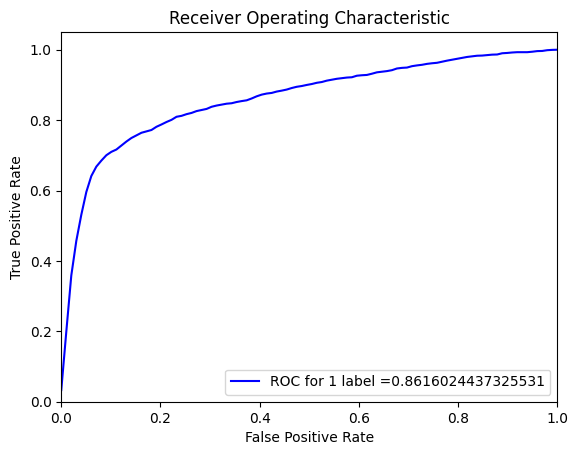

In [31]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(mean_fpr, mean_tpr, 'b', label= "ROC for 1 label =" +str(mean_auc))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LogisticRegression

In [32]:
log_model = LogisticRegression(penalty='l2', max_iter=500)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(log_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LR is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(log_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 13.76s
mean accuracy: 0.72 %
mean f1 socre: 0.71 %
mean precision: 0.72 %
mean recall: 0.72 %

ROC across folds for zero:  0.4545581133822928

ROC across folds for one:  0.842998020061336

ROC across folds for two:  0.4511522248201034

ROC across folds for three:  0.458537299770696

ROC across folds for four:  0.5855958651234496
the average accuracy of LR is 0.7183946488294313
the presion, recall, f are [[7.54837444e-01 7.30077439e-01 7.24751084e-01 7.63498326e-01
  7.74469697e-01 5.60217748e-01]
 [6.75140337e-01 6.16410256e-01 8.00

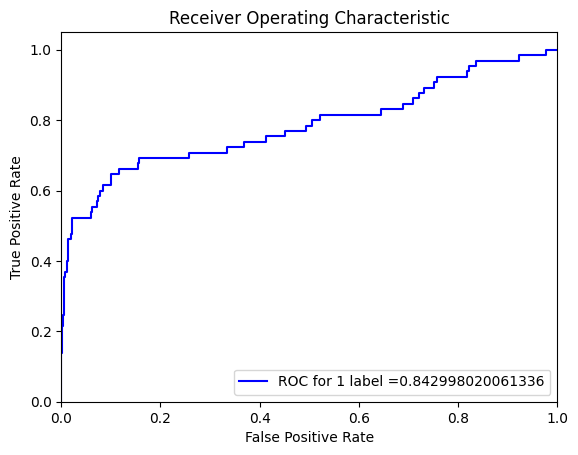

In [33]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LinearSVC

In [34]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_svm = []

tprs_zero_svm = []
tprs_one_svm = []
tprs_two_svm = []
tprs_three_svm = []
tprs_four_svm = []

mean_fpr_svm = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(svm, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=3)
    fpr_four_svm, tpr_four_svm, _____ = roc_curve(y_test, svm.decision_function (X_test)[:,3], pos_label=3)

    tprs_four_svm.append(interp(mean_fpr_svm, fpr_four_svm, tpr_four_svm))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_svm, tpr_four_svm))
    
    
     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_svm = sum(roc_auc_four_svm) / len(roc_auc_four_svm)
#print("\nROC across folds for four: ", roc_four_svm)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LSV is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

mean_tpr_svm = np.mean(tprs_four_svm, axis=0)
mean_auc_svm = auc(mean_fpr_svm, mean_tpr_svm)

#print(mean_tpr_svm)
#print(mean_fpr_svm)
#print(mean_auc_svm)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(svm, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 48.22s
mean accuracy: 0.89 %
mean f1 socre: 0.89 %
mean precision: 0.89 %
mean recall: 0.89 %
the average accuracy of LSV is 0.8918617614269786
the presion, recall, f are [[  0.90332052   0.84938658   0.90409424   0.90922677   0.70919106
    0.86001947]
 [  0.86229618   0.84181818   0.91078878   0.93185475   0.85714286
    0.80263158]
 [  0.88179677   0.8450943    0.90737136   0.9203325    0.77446592
    0.82927703]
 [ 86.5         65.2        387.8        228.9         14.6
  114.        ]]
[(0, 3490), (1, 3490), (2, 3490), (3, 349

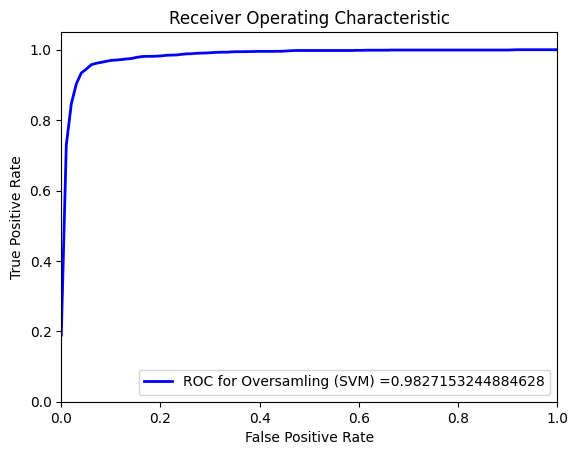

In [35]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_svm, mean_tpr_svm, 'b', label= "ROC for Oversamling (SVM) =" +str(mean_auc_svm),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_rf = []

tprs_zero_rf = []
tprs_one_rf = []
tprs_two_rf = []
tprs_three_rf = []
tprs_four_rf = []

mean_fpr_rf = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #Oversampling
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(rf_model, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_rf, tpr_four_rf, _____ = roc_curve(y_test, rf_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_rf.append(interp(mean_fpr_rf, fpr_four_rf, tpr_four_rf))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_rf, tpr_four_rf))
    
        #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_rf = sum(roc_auc_four_rf) / len(roc_auc_four_rf)
#print("\nROC across folds for four: ", roc_four_rf)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of RF is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


mean_tpr_rf = np.mean(tprs_four_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

#print(mean_tpr_rf)
#print(mean_fpr_rf)
#print(mean_auc_rf)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(rf_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 17.97s
mean accuracy: 0.94 %
mean f1 socre: 0.94 %
mean precision: 0.94 %
mean recall: 0.94 %
the average accuracy of RF is 0.9390189520624302
the presion, recall, f are [[  0.9578654    0.94214293   0.94154833   0.95267988   0.71937057
    0.92903575]
 [  0.92821438   0.90624709   0.95874357   0.95108021   0.92666667
    0.87631579]
 [  0.942493     0.92318168   0.94908737   0.95130808   0.80619239
    0.89900851]
 [ 86.5         65.2        387.8        228.9         14.6
  114.        ]]
[(0, 3490), (1, 3490), (2, 3490), (3, 3490

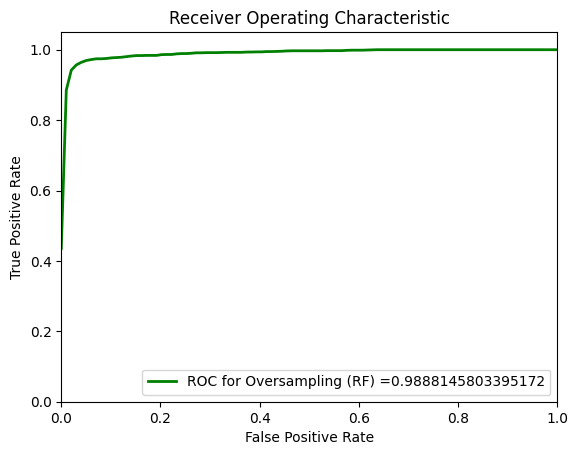

In [37]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one, tpr_one, 'b', color='red', label= "Oversampling =" +str(roc_one))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', color='green', label= "ROC for Oversampling (RF) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=3)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()

mean_fpr_rf = np.linspace(0,1,100)              # change the name of classifier

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(knn_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, knn_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of KNN is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


mean_tpr_rf = np.mean(tprs_four_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(knn_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 21.21s
mean accuracy: 0.55 %
mean f1 socre: 0.54 %
mean precision: 0.59 %
mean recall: 0.55 %

ROC across folds for zero:  0.48196444097294944

ROC across folds for one:  0.7573648861041686

ROC across folds for two:  0.4717335574890297

ROC across folds for three:  0.46634720221572945

ROC across folds for four:  0.466729711892307
the average accuracy of KNN is 0.5488294314381271
the presion, recall, f are [[4.04811332e-01 5.49575800e-01 6.59080071e-01 4.86442727e-01
  5.68571429e-01 6.93625309e-01]
 [6.13966854e-01 3.65034965e-01 

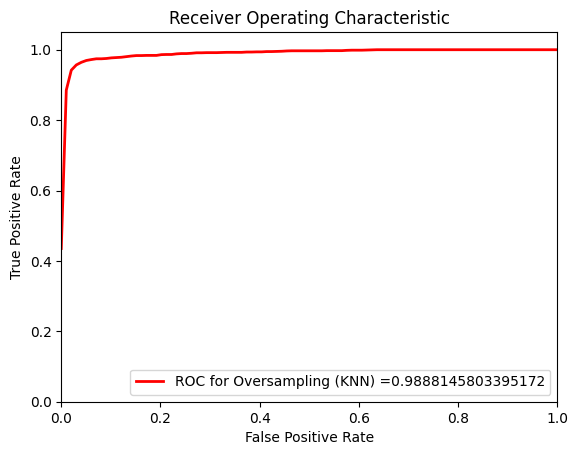

In [39]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', color='red', label= "ROC for Oversampling (KNN) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Multilayer Perceptron

In [40]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []

tprs_zero_mlp = []
tprs_one_mlp = []
tprs_two_mlp = []
tprs_three_mlp = []
tprs_four_mlp = []

mean_fpr_mlp = np.linspace(0,1,100)


st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(mlp_model, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_mlp, tpr_four_mlp, _____ = roc_curve(y_test, mlp_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_mlp.append(interp(mean_fpr_mlp, fpr_four_mlp, tpr_four_mlp))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_mlp, tpr_four_mlp))
    
        
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four = sum(roc_auc_four) / len(roc_auc_four)
#print("\nROC across folds for four: ", roc_four)
mean_tpr_mlp = np.mean(tprs_four_mlp, axis=0)
mean_auc_mlp = auc(mean_fpr_mlp, mean_tpr_mlp)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MLP is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_mlp)
#print(mean_fpr_mlp)
print(mean_auc_mlp)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(mlp_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 1702.65s
mean accuracy: 0.93 %
mean f1 socre: 0.93 %
mean precision: 0.94 %
mean recall: 0.93 %
the average accuracy of MLP is 0.9347826086956521
the presion, recall, f are [[  0.92458887   0.90594758   0.94944502   0.94526919   0.9111859
    0.89391637]
 [  0.92461909   0.92160839   0.93658528   0.95720141   0.92
    0.90087719]
 [  0.92443393   0.91326461   0.94294284   0.95114619   0.91500079
    0.89729911]
 [ 86.5         65.2        387.8        228.9         14.6
  114.        ]]
0.9863490188842077
[(0, 3490), (1, 3490), (2, 

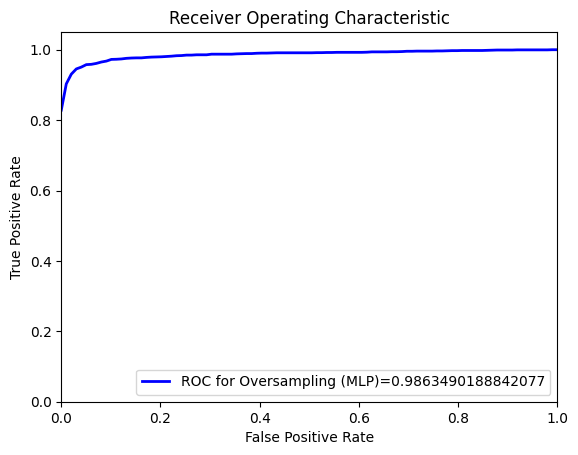

In [41]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one, tpr_one, 'b', color='green', label= "Oversampling =" +str(roc_one))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_mlp, mean_tpr_mlp, 'b', label= "ROC for Oversampling (MLP)=" +str(mean_auc_mlp),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

In [42]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(gb_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, gb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of GB is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(gb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 42.01s
mean accuracy: 0.74 %
mean f1 socre: 0.73 %
mean precision: 0.75 %
mean recall: 0.74 %

ROC across folds for zero:  0.37092729949645464

ROC across folds for one:  0.8077057880812912

ROC across folds for two:  0.6005256842371972

ROC across folds for three:  0.3687634787474288

ROC across folds for four:  0.5283611964982293
the average accuracy of GB is 0.7400222965440356
the presion, recall, f are [[7.04982931e-01 7.52242224e-01 7.06740382e-01 8.39323986e-01
  7.45238095e-01 7.45078333e-01]
 [6.35886127e-01 5.33613054e-01 8

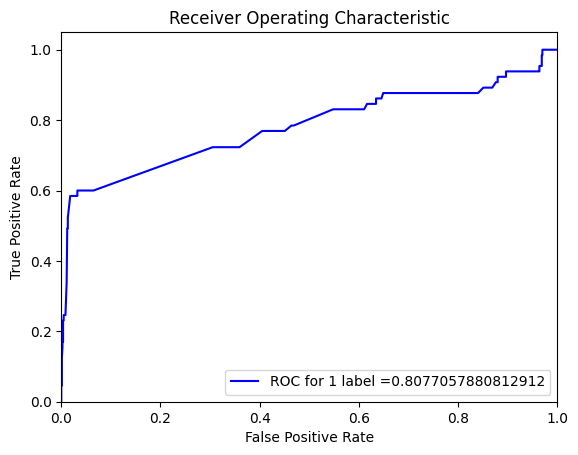

In [43]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ensemble Methods
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. 

### Voting Classifier

In [44]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)

vote_model = VotingClassifier(estimators=[('mlp', mlp_model),('mlp1', mlp_model)], voting='soft')

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

#
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []

tprs_zero_v = []
tprs_one_v = []
tprs_two_v = []
tprs_three_v = []
tprs_four_v = []

mean_fpr_v = np.linspace(0,1,100)
#
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    # X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(vote_model, X_train, X_test, y_train, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    fpr_four_v, tpr_four_v, _____ = roc_curve(y_test, vote_model.predict_proba (X_test)[:,3], pos_label=3)     #
    tprs_four_v.append(interp(mean_fpr_v, fpr_four_v, tpr_four_v))                                             #
    roc_auc_four = (auc(fpr_four_v, tpr_four_v))                                                               #
    

    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time)) 
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#
mean_tpr_v = np.mean(tprs_four_v, axis=0)
mean_auc_v = auc(mean_fpr_v, mean_tpr_v)
#
#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of Voting is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(vote_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 650.30s
mean accuracy: 0.68 %
mean f1 socre: 0.68 %
mean precision: 0.68 %
mean recall: 0.68 %
the average accuracy of Voting is 0.6818283166109252
the presion, recall, f are [[7.25350055e-01 6.84708546e-01 6.97751374e-01 7.21106944e-01
  7.90620491e-01 4.98928636e-01]
 [6.45148356e-01 5.91911422e-01 7.65342710e-01 7.17762200e-01
  3.56190476e-01 4.46491228e-01]
 [6.81952687e-01 6.32366479e-01 7.29893178e-01 7.18697192e-01
  4.84018422e-01 4.69106157e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01

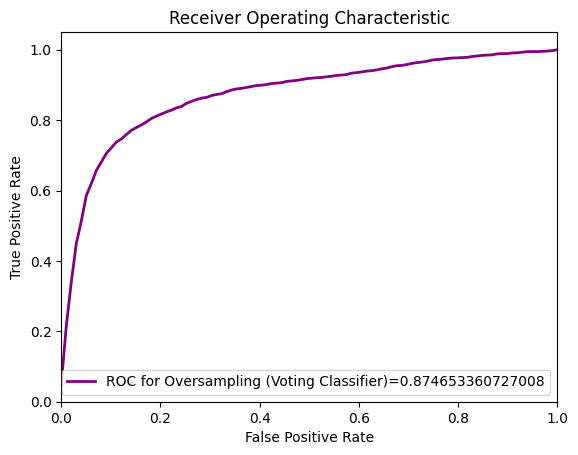

In [45]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_v, mean_tpr_v, 'b', color='purple', label= "ROC for Oversampling (Voting Classifier)=" +str(mean_auc_v),lw=2, alpha=1)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AdaBoost
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data.

In [46]:
ada_model = AdaBoostClassifier(n_estimators=500)

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    # X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(ada_model, X_train, X_test, y_train, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
        
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time)) 
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of AdaBoost is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(ada_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 85.98s
mean accuracy: 0.58 %
mean f1 socre: 0.61 %
mean precision: 0.58 %
mean recall: 0.59 %
the average accuracy of AdaBoost is 0.5843924191750279
the presion, recall, f are [[5.38706407e-01 3.35336510e-01 6.43815149e-01 7.23826865e-01
  3.50825841e-01 4.92719540e-01]
 [6.61267041e-01 5.53543124e-01 6.01066890e-01 6.54834138e-01
  2.30952381e-01 3.90350877e-01]
 [5.91905800e-01 4.06725279e-01 6.18390980e-01 6.85812193e-01
  2.74817099e-01 4.30956725e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+0

# Undersampling

### MultinomialNB

In [47]:
nb_model = MultinomialNB()

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(nb_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, nb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                 #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of NBM is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 0.35s
mean accuracy: 0.50 %
mean f1 socre: 0.59 %
mean precision: 0.50 %
mean recall: 0.52 %

ROC across folds for zero:  0.5541568283464428

ROC across folds for one:  0.7779535913643192

ROC across folds for two:  0.3656206226187862

ROC across folds for three:  0.5891571445285472

ROC across folds for four:  0.4320111212976445
the average accuracy of NBM is 0.4989966555183948
the presion, recall, f are [[4.89135457e-01 3.42132831e-01 6.49693015e-01 7.74258504e-01
  8.24715597e-02 2.97634777e-01]
 [5.72293504e-01 5.49020979e-01 5.

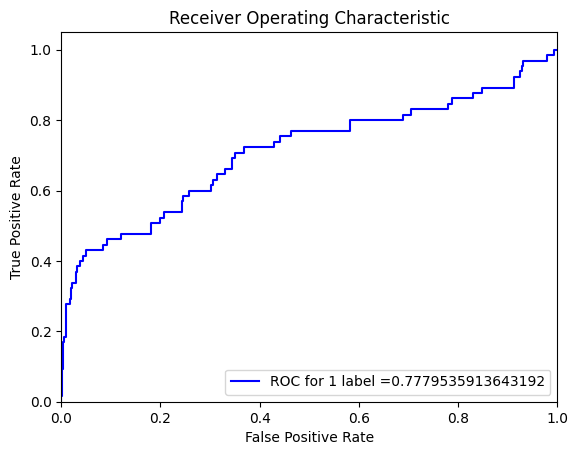

In [48]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LogisticRegression

In [49]:
log_model = LogisticRegression(penalty='l2', max_iter=500)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(log_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, log_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####


    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LR is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(log_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 4.07s
mean accuracy: 0.51 %
mean f1 socre: 0.61 %
mean precision: 0.51 %
mean recall: 0.53 %

ROC across folds for zero:  0.4179127188187414

ROC across folds for one:  0.8001468688713551

ROC across folds for two:  0.48819264727527345

ROC across folds for three:  0.46781283148945824

ROC across folds for four:  0.4206863326682126
the average accuracy of LR is 0.5063545150501673
the presion, recall, f are [[5.17240289e-01 3.83274457e-01 7.13618463e-01 6.78460137e-01
  7.69299659e-02 3.52477506e-01]
 [6.65878107e-01 5.87296037e-01 4

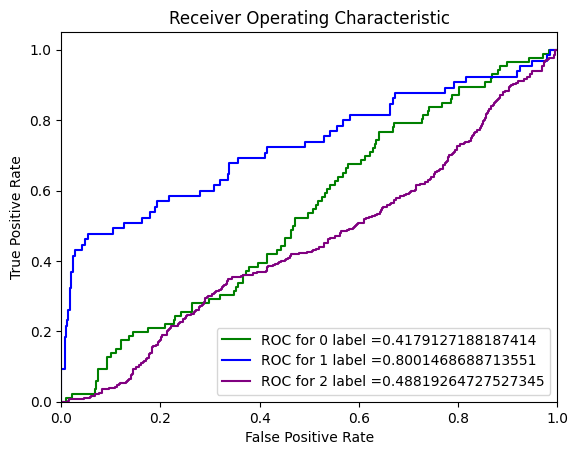

In [50]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LinearSVC

In [51]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_svm = []

tprs_zero_svm_under = []
tprs_one_svm_under = []
tprs_two_svm_under = []
tprs_three_svm_under = []
tprs_four_svm_under = []

mean_fpr_svm_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(svm, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=3)
    fpr_four_under_svm, tpr_four_under_svm, _____ = roc_curve(y_test, svm.decision_function (X_test)[:,3], pos_label=3)

    tprs_four_svm_under.append(interp(mean_fpr_svm_under, fpr_four_under_svm, tpr_four_under_svm))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_under_svm, tpr_four_under_svm))
    
                         #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####


    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_under_svm = sum(roc_auc_four_svm) / len(roc_auc_four_svm)
#print("\nROC across folds for four: ", roc_four_under_svm)

mean_tpr_svm_under = np.mean(tprs_four_svm_under, axis=0)
mean_auc_svm_under = auc(mean_fpr_svm_under, mean_tpr_svm_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of SVC is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_svm_under)
#print(mean_fpr_svm_under)
print(mean_auc_svm_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(svm, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 0.45s
mean accuracy: 0.51 %
mean f1 socre: 0.61 %
mean precision: 0.51 %
mean recall: 0.53 %
the average accuracy of SVC is 0.5073578595317725
the presion, recall, f are [[4.93637546e-01 3.72321229e-01 7.15014124e-01 6.85140893e-01
  8.07546156e-02 3.64895573e-01]
 [6.71692061e-01 5.96503497e-01 3.92714910e-01 6.36968513e-01
  5.82380952e-01 4.51754386e-01]
 [5.68073180e-01 4.57989471e-01 5.06703992e-01 6.59810204e-01
  1.41586949e-01 4.02594178e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01 1.14

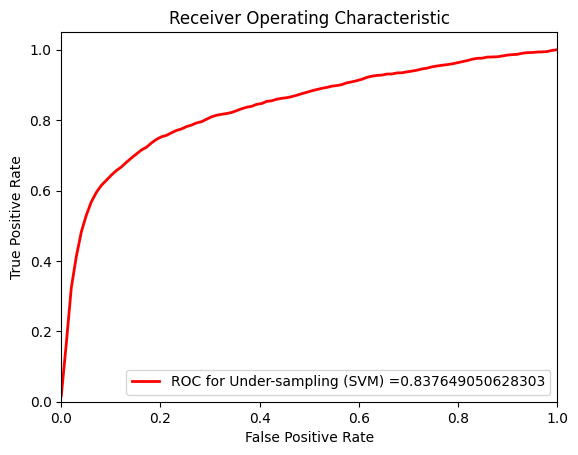

In [52]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_svm_under, mean_tpr_svm_under, 'b', color='red', label= "ROC for Under-sampling (SVM) =" +str(mean_auc_svm_under) ,lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RandomForestClassifier

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_under = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_under = []

tprs_zero_rf_under = []
tprs_one_rf_under = []
tprs_two_rf_under = []
tprs_three_rf_under = []
tprs_four_rf_under = []

mean_fpr_rf_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(rf_model, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_under, tpr_under, __ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_under_rf, tpr_four_under_rf, _____ = roc_curve(y_test, rf_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_rf_under.append(interp(mean_fpr_rf_under, fpr_four_under_rf, tpr_four_under_rf))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_rf, tpr_four_rf))
    
                             #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one_under = sum(roc_auc_under) / len(roc_auc_under)
#print("\nROC across folds for one: ", roc_one_under)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_under_rf = sum(roc_auc_four_under) / len(roc_auc_four_under)
#print("\nROC across folds for four: ", roc_four_under_rf)

mean_tpr_rf_under = np.mean(tprs_four_rf_under, axis=0)
mean_auc_rf_under = auc(mean_fpr_rf_under, mean_tpr_rf_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of RF is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_rf_under)
#print(mean_fpr_rf_under)
print(mean_auc_rf_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(rf_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2.53s
mean accuracy: 0.60 %
mean f1 socre: 0.66 %
mean precision: 0.60 %
mean recall: 0.62 %
the average accuracy of RF is 0.6025641025641024
the presion, recall, f are [[5.60570278e-01 5.04638838e-01 7.53695961e-01 6.93130035e-01
  1.06788979e-01 5.09324449e-01]
 [6.98302593e-01 6.54918415e-01 5.54673806e-01 6.92450011e-01
  5.53809524e-01 4.88596491e-01]
 [6.19530202e-01 5.68936883e-01 6.38480200e-01 6.92019647e-01
  1.78239172e-01 4.96851615e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01 1.140

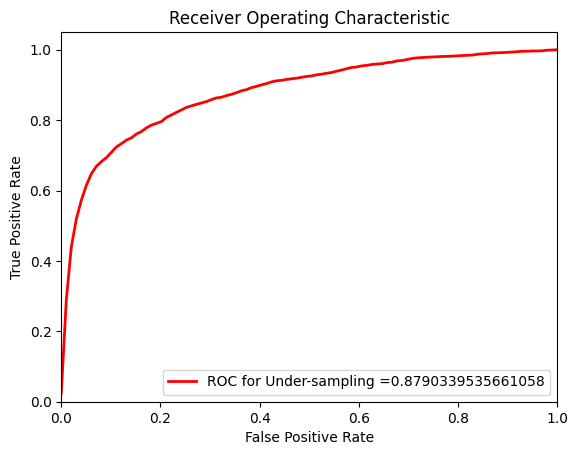

In [54]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_under, tpr_under, 'b', label= "Under-sampling =" +str(roc_one_under))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_rf_under, mean_tpr_rf_under, 'b', color='red', label= "ROC for Under-sampling =" +str(mean_auc_rf_under),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=3)
accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(knn_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, knn_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of KNN is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(knn_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2.68s
mean accuracy: 0.24 %
mean f1 socre: 0.47 %
mean precision: 0.24 %
mean recall: 0.23 %

ROC across folds for zero:  0.45990873697997625

ROC across folds for one:  0.6483934028863388

ROC across folds for two:  0.5037477465979393

ROC across folds for three:  0.4673620005461913

ROC across folds for four:  0.48956882715336036
the average accuracy of KNN is 0.24437012263099223
the presion, recall, f are [[1.31522655e-01 2.40560651e-01 6.02305627e-01 4.31071001e-01
  1.47679605e-01 5.18344359e-01]
 [7.55894146e-01 2.14848485e-01

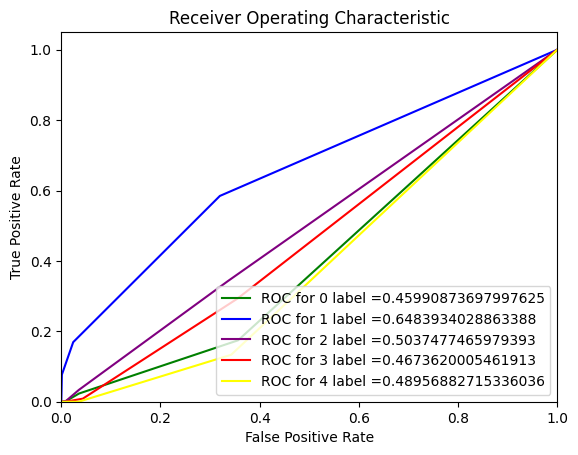

In [56]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### MLPClassifier

In [57]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)
accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one_under = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_mlp = []

tprs_zero_mlp_under = []
tprs_one_mlp_under = []
tprs_two_mlp_under = []
tprs_three_mlp_under = []
tprs_four_mlp_under = []

mean_fpr_mlp_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(mlp_model, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one_under, tpr_one_under, __ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_mlp_under, tpr_four_mlp_under, _____ = roc_curve(y_test, mlp_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_mlp_under.append(interp(mean_fpr_mlp_under, fpr_four_mlp_under, tpr_four_mlp_under))
    
        #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    #roc_auc_four = (auc(fpr_four_mlp_under, tpr_four_mlp_under))

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_mlp_under = sum(roc_auc_one_under) / len(roc_auc_one_under)
#print("\nROC across folds for one: ", roc_mlp_under)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_mlp_under_four = sum(roc_auc_four_mlp) / len(roc_auc_four_mlp)
#print("\nROC across folds for four: ", roc_mlp_under_four)

mean_tpr_mlp_under = np.mean(tprs_four_mlp_under, axis=0)
mean_auc_mlp_under = auc(mean_fpr_mlp_under, mean_tpr_mlp_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MLP is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_mlp_under)
#print(mean_fpr_mlp_under)
print(mean_auc_mlp_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(mlp_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 37.10s
mean accuracy: 0.52 %
mean f1 socre: 0.61 %
mean precision: 0.52 %
mean recall: 0.53 %
the average accuracy of MLP is 0.5207357859531773
the presion, recall, f are [[4.57878210e-01 3.90024296e-01 7.40517546e-01 6.64725020e-01
  1.44098780e-01 3.82398206e-01]
 [6.94693932e-01 6.33263403e-01 3.99686992e-01 6.39144258e-01
  9.53333333e-01 4.42982456e-01]
 [5.51576866e-01 4.82268807e-01 5.18741432e-01 6.51088673e-01
  2.50107423e-01 4.10340700e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+01 1.1

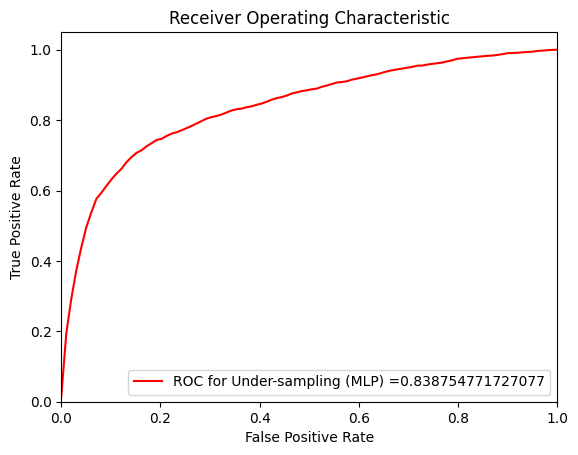

In [58]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one_under, tpr_one_under, 'b', label= "Under-sampling =" +str(roc_mlp_under))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_mlp_under, mean_tpr_mlp_under, 'b', color='red', label= "ROC for Under-sampling (MLP) =" +str(mean_auc_mlp_under))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

In [59]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(gb_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, gb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of GBC is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(gb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 27.64s
mean accuracy: 0.53 %
mean f1 socre: 0.71 %
mean precision: 0.53 %
mean recall: 0.59 %

ROC across folds for zero:  0.35827354632154657

ROC across folds for one:  0.825008183585098

ROC across folds for two:  0.5142790074359237

ROC across folds for three:  0.4682814102053941

ROC across folds for four:  0.37913455126608336
the average accuracy of GBC is 0.5346711259754737
the presion, recall, f are [[5.96143905e-01 5.58957815e-01 7.93637686e-01 8.09978334e-01
  6.65155931e-02 4.70192377e-01]
 [7.05185779e-01 6.57785548e-01 

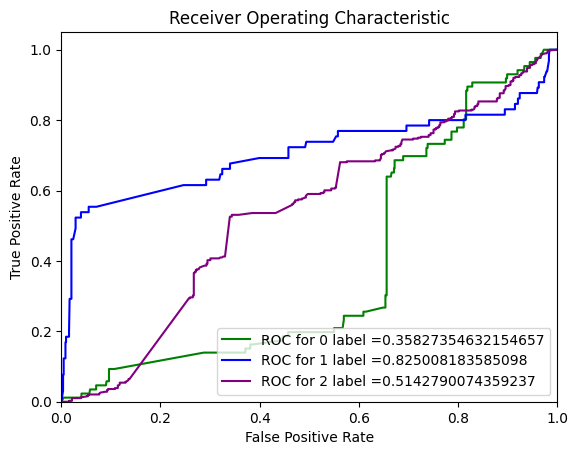

In [60]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ensemble Methods
Ensemble methods are techniques that create multiple models and then combine them to produce improved results.

### Voting Classifier

In [61]:
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)
log_model = LogisticRegression(penalty='l2', max_iter=500)

vote_model = VotingClassifier(estimators=[('nb', nb_model), ('rf', rf_model), ('log', log_model)], voting='hard')

accs = []
reports = []
f1 = []
pr = []
re =[]
#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

st_time = time.time()

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(vote_model, X_train_under, X_test, y_train_under, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))


#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of Voting Classifier is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


unique, counts = np.unique(y_train_under, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(vote_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 5.56s
mean accuracy: 0.59 %
mean f1 socre: 0.66 %
mean precision: 0.59 %
mean recall: 0.60 %
the average accuracy of Voting Classifier is 0.5884057971014494
the presion, recall, f are [[4.62976433e-01 4.53558330e-01 7.50315190e-01 7.52455214e-01
  1.89104500e-01 4.72298485e-01]
 [7.54891740e-01 6.87039627e-01 5.17277365e-01 6.37391787e-01
  9.46666667e-01 5.03508772e-01]
 [5.73713867e-01 5.45793519e-01 6.12143970e-01 6.89654446e-01
  3.14895069e-01 4.86770412e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.460

### Ada Boost Classifier
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data.

In [62]:
ada_model = AdaBoostClassifier(n_estimators=500)

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
st_time = time.time()

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(ada_model, X_train_under, X_test, y_train_under, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
    
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of AdaBoost is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####
unique, counts = np.unique(y_train_under, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(ada_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 40.98s
mean accuracy: 0.48 %
mean f1 socre: 0.60 %
mean precision: 0.48 %
mean recall: 0.51 %
the average accuracy of AdaBoost is 0.4797101449275362
the presion, recall, f are [[5.24868562e-01 3.82612352e-01 7.23070345e-01 5.74048539e-01
  8.23598079e-02 4.41793154e-01]
 [5.68684844e-01 4.92167832e-01 4.03565625e-01 5.78851605e-01
  9.30952381e-01 4.07017544e-01]
 [5.45509638e-01 4.28519532e-01 5.17476523e-01 5.76181471e-01
  1.51278918e-01 4.22634869e-01]
 [8.65000000e+01 6.52000000e+01 3.87800000e+02 2.28900000e+02
  1.46000000e+0

# ROC Combine

### ROC for Random Forest

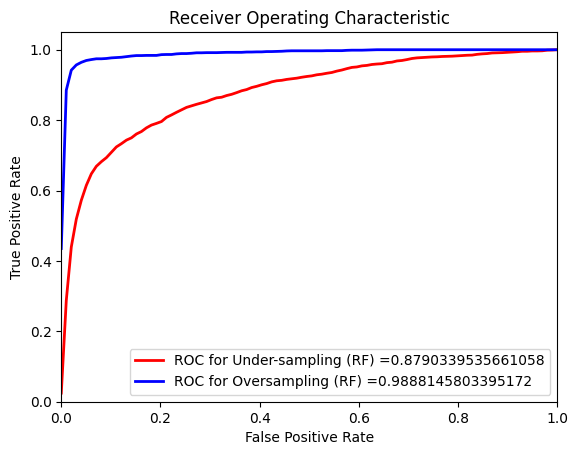

In [63]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_rf_under, mean_tpr_rf_under, 'b', color='red', label= "ROC for Under-sampling (RF) =" +str(mean_auc_rf_under),lw=2, alpha=1)
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', label= "ROC for Oversampling (RF) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC for MLP

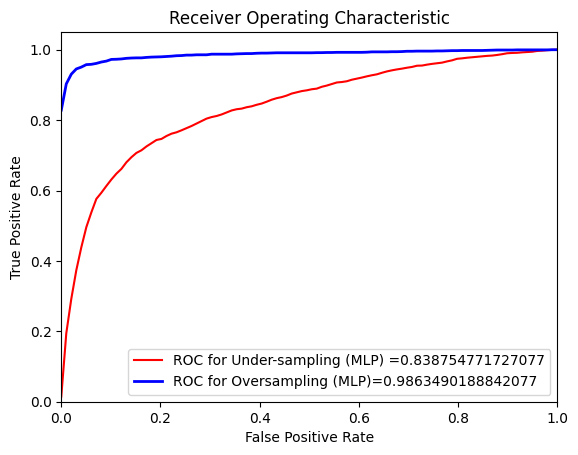

In [64]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_mlp_under, mean_tpr_mlp_under, 'b', color='red', label= "ROC for Under-sampling (MLP) =" +str(mean_auc_mlp_under))
plt.plot(mean_fpr_mlp, mean_tpr_mlp, 'b', label= "ROC for Oversampling (MLP)=" +str(mean_auc_mlp),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC for SVM

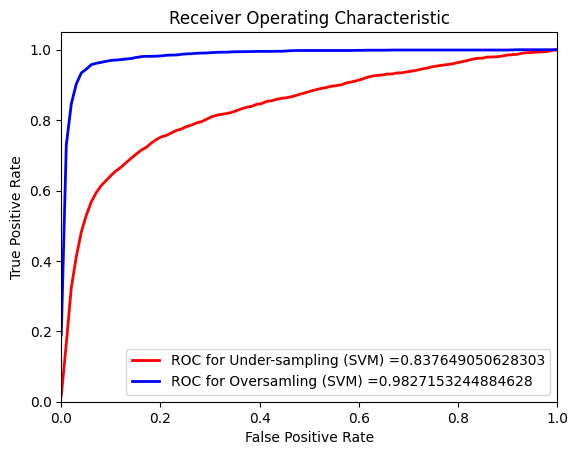

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_svm_under, mean_tpr_svm_under, 'b', color='red', label= "ROC for Under-sampling (SVM) =" +str(mean_auc_svm_under) ,lw=2, alpha=1)
plt.plot(mean_fpr_svm, mean_tpr_svm, 'b', label= "ROC for Oversamling (SVM) =" +str(mean_auc_svm),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()